# ***INSTALL DEPENDENCIES*** #

In [2]:
from IPython.display import Markdown, display


with open('../README.md', 'r', encoding='utf-8') as f:
    display(Markdown(f.read()))

# Deep Learning Examples with Keras

A collection of deep learning examples using Keras, covering neural networks, recommender systems, convolutions, and object detection. Based on the course **Advanced Machine Learning**, University of Debrecen.

## GitHub Repository (Standalone Version)

You can access the non-Colab version of the project directly on GitHub:

[github.com/KeremDUZENLI/python-keras-deep-learning](https://github.com/KeremDUZENLI/python-keras-deep-learning)

## Install

1. Download Python 3.6.8: [Python 3.6.8 Download](https://www.python.org/downloads/release/python-368/)
2. Check Python versions installed: `py -0`
3. Check the default version: `python --version`
4. Select Python 3.6.8: [Video Guide](https://www.youtube.com/watch?v=C5mn0WWKmGY&t=10s)

## Setup

1. Clone the repository:
   ```sh
   git clone https://github.com/KeremDUZENLI/python-keras-deep-learning.git
   ```
2. Create a virtual environment:
   ```sh
   python -m venv myEnv
   ```
3. Activate the virtual environment:
   - **Windows**: `myEnv\Scripts\activate`
   - **Linux/macOS**: `source myEnv/bin/activate`
4. Update pip:
   ```sh
   python -m pip install --upgrade pip
   ```
5. Update setuptools:
   ```sh
   pip install --upgrade setuptools
   ```
6. Install dependencies:
   ```sh
   pip install -r requirements.txt
   ```
7. Freeze dependencies (optional):
   ```sh
   python -m pip freeze > requirements.txt
   ```

## Notebooks

1. Install Jupyter:
   ```sh
   pip install jupyterlab
   ```
2. Launch Jupyter:
   ```sh
   jupyter lab
   ```

### Notebook Descriptions

- [1. Neural Networks](notebooks/1_neural_networks.ipynb) – Basics of neural networks with Keras.
- [2. Backpropagation](notebooks/2_backpropagation.ipynb) – Understanding the backpropagation algorithm and its implementation in Keras.
- [3. Neural Recommender](notebooks/3_neural_recommender.ipynb) – Building a simple recommender system using neural networks.
- [4. Convolutional Networks](notebooks/4_convolutional_network.ipynb) – Introduction to convolutional neural networks (CNNs) for image classification.
- [5. Fully Convolutional Networks](notebooks/5_full_convolutional_network.ipynb) – Implementing a full convolutional network for image segmentation tasks.
- [6. CNN Classification](notebooks/6_convolutional_network_classification.ipynb) – Classifying images using a convolutional neural network.
- [7. Text Classification & Seq2Seq Translation](notebooks/7_text_classification_seq2seq_translation.ipynb) – Text classification using RNNs and sequence-to-sequence models for language translation.
- [8. Variational Autoencoders](notebooks/8_variational_autoencoders.ipynb) – Implementing variational autoencoders for generative modeling.

## Acknowledgments

This project is based on the **Advanced Machine Learning** course at the **University of Debrecen**

- **Prof. Dr. András Hajdu** – Dean, Head of Department

  - _Department of Data Science and Visualization, Faculty of Informatics, University of Debrecen_
  - Email: [hajdu.andras@inf.unideb.hu](mailto:hajdu.andras@inf.unideb.hu)

- **Dr. Balázs Harangi** – Associate Professor, Deputy Head of Department

  - _Department of Data Science and Visualization, Faculty of Informatics, University of Debrecen_
  - Email: [harangi.balazs@inf.unideb.hu](mailto:harangi.balazs@inf.unideb.hu)

- **Kerem Düzenli** – PhD Candidate, University of Debrecen

  - _Creator and maintainer of this repository_
  - Email: [kerem.duzenli@inf.unideb.hu](mailto:kerem.duzenli@inf.unideb.hu)

## Contributing

1. Fork the repository.
2. Create a new branch:
   ```sh
   git checkout -b YourBranch
   ```
3. Make your changes and commit them:
   ```sh
   git commit -m "Add some feature"
   ```
4. Push to the branch:
   ```sh
   git push origin YourBranch
   ```
5. Open a pull request.

## License

This project is licensed under the **Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)** license. This means you are free to:

- **Share** – Copy and redistribute the material in any medium or format.
- **Adapt** – Remix, transform, and build upon the material.

However, **you may not use the material for commercial purposes**.

For details, see the [LICENSE](LICENSE) file or read more at [Creative Commons](https://creativecommons.org/licenses/by-nc/4.0/).

## Disclaimer

This repository is intended **only for educational and research purposes**. The authors and contributors assume no responsibility for misuse of the code or any implications arising from its use.

## Support My Work

If you find this resource valuable and would like to help support my education and doctoral research, please consider treating me to a cup of coffee (or tea) via Revolut.

<div align="center">
  <a href="https://revolut.me/krmdznl" target="_blank">
    <img src="https://img.shields.io/badge/Support%20My%20Projects-Donate%20via%20Revolut-orange?style=for-the-badge" alt="Support my education via Revolut" />
  </a>
</div> <br>


# Step 1: Loading and Exploring the Dataset

Dataset shape: (1797, 64)


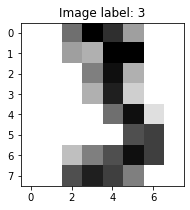

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits


# Load the digits dataset
digits = load_digits()

# Print the shape of the data
print("Dataset shape:", digits.data.shape)

# Display a sample image
sample_index = 45
plt.figure(figsize=(3, 3))
plt.imshow(digits.images[sample_index], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"Image label: {digits.target[sample_index]}")
plt.show()

# Step 2: Preprocessing the Data

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


# Convert data to appropriate types
data = np.asarray(digits.data, dtype='float32')
target = np.asarray(digits.target, dtype='int32')

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=37)

# Normalize the data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1527, 64)
Test set shape: (270, 64)


# Step 3: Helper Functions

In [3]:
def one_hot(n_classes, y):
    y = np.array(y)                                  # Ensure NumPy array
    one_hot_encoded = np.zeros((y.size, n_classes))  # Zero matrix
    one_hot_encoded[np.arange(y.size), y] = 1        # Set 1 at correct indices
    return one_hot_encoded

print("One-hot encoding for label 3:", one_hot(n_classes=10, y=3))
print("One-hot encoding for labels [0, 4, 9, 1]:\n", one_hot(n_classes=10, y=[0, 4, 9, 1]))


def softmax(X):
    X = np.array(X)
    if X.ndim == 1:        # Single vector
        X = X - np.max(X)  # Stabilize
        exp_X = np.exp(X)
        return exp_X / np.sum(exp_X)
    elif X.ndim == 2:      # Matrix (batch)
        X = X - np.max(X, axis=1, keepdims=True)
        exp_X = np.exp(X)
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)

print("\nSoftmax of a single vector:")
print(np.sum(softmax([10, 2, -3])))  # Should sum to 1

print("\nSoftmax of 2 vectors:")
X = np.array([[10, 2, -3], [-1, 5, -20]])
print(softmax(X))  # Each row should sum to 1

print("\nSum of softmax rows:")
print(np.sum(softmax(X), axis=1))  # Should be [1, 1]


def nll(Y_true, Y_pred):
    Y_true = np.array(Y_true, dtype=np.float32)
    Y_pred = np.array(Y_pred, dtype=np.float32)
    epsilon = 1e-10  # Prevent log(0)
    Y_pred = np.clip(Y_pred, epsilon, 1.0)
    if Y_true.ndim == 1:  # Single example
        Y_true = Y_true.reshape(1, -1)
        Y_pred = Y_pred.reshape(1, -1)
    return -np.mean(np.sum(Y_true * np.log(Y_pred), axis=1))

print("\nNLL of confident correct prediction:", nll([1, 0, 0], [.99, 0.01, 0]))  # Near 0
print("NLL of confident wrong prediction:", nll([1, 0, 0], [0.01, 0.01, .98]))  # Large

# Test with multiple samples
Y_true = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]])
Y_pred = np.array([[0,   1,    0], [.99, 0.01, 0], [0,   0,    1]])

# Should be close to 0 for perfect prediction
print("\nAverage NLL:", nll(Y_true, Y_pred))

One-hot encoding for label 3: [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
One-hot encoding for labels [0, 4, 9, 1]:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

Softmax of a single vector:
1.0

Softmax of 2 vectors:
[[9.99662391e-01 3.35349373e-04 2.25956630e-06]
 [2.47262316e-03 9.97527377e-01 1.38536042e-11]]

Sum of softmax rows:
[1. 1.]

NLL of confident correct prediction: 0.010050327
NLL of confident wrong prediction: 4.6051702

Average NLL: 0.0033501089


# Step 4: Logistic Regression

In [4]:
class LogisticRegression:
    def __init__(self, input_size, output_size):
        self.W = np.random.uniform(size=(input_size, output_size), high=0.1, low=-0.1)
        self.b = np.random.uniform(size=output_size, high=0.1, low=-0.1)
        self.output_size = output_size

    def forward(self, X):
        Z = np.dot(X, self.W) + self.b
        return softmax(Z)

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def grad_loss(self, x, y_true):
        y_pred = self.forward(x)
        target = one_hot(self.output_size, y_true)
        if target.ndim > 1:
            target = target.squeeze()
        dnll_output = y_pred - target
        grad_W = x[:, np.newaxis] @ dnll_output[np.newaxis, :]
        grad_b = dnll_output
        return {"W": grad_W, "b": grad_b}

    def train(self, x, y, learning_rate):
        grads = self.grad_loss(x, y)
        self.W -= learning_rate * grads["W"]
        self.b -= learning_rate * grads["b"]

    def loss(self, x, y):
        return nll(one_hot(self.output_size, y), self.forward(x))

    def accuracy(self, X, y):
        if len(X.shape) == 1:
            X = X[np.newaxis, :]
        y_preds = self.forward(X)
        return np.mean(np.argmax(y_preds, axis=1) == y)


# Build a model and test its forward inference
n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))
lr = LogisticRegression(n_features, n_classes)

# Evaluate untrained model
print("\nEvaluation of the untrained model:")
train_loss = lr.loss(X_train, y_train)
train_acc = lr.accuracy(X_train, y_train)
test_acc = lr.accuracy(X_test, y_test)
print(f"Initial train loss= {train_loss:.4f} | train acc= {train_acc:.3f} | test acc= {test_acc:.3f}")


Evaluation of the untrained model:
Initial train loss= 2.3372 | train acc= 0.147 | test acc= 0.152


# Step 5: Visualizing Predictions

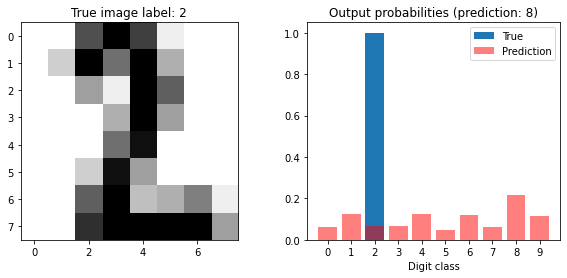

In [5]:
def plot_prediction(model, sample_idx=0, classes=range(10)):
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    
    # Display the image
    ax0.imshow(scaler.inverse_transform(X_test[sample_idx].reshape(1, -1)).reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax0.set_title(f"True image label: {y_test[sample_idx]}")
    
    # Get probabilities and prediction
    probabilities = model.forward(X_test[sample_idx])
    predicted_label = model.predict(X_test[sample_idx])
    
    # Plot true vs predicted
    true_class = np.zeros(len(classes))
    true_class[y_test[sample_idx]] = 1
    ax1.bar(classes, true_class, label='True')
    ax1.bar(classes, probabilities, label='Prediction', color="red", alpha=0.5)
    ax1.set_xticks(classes)
    ax1.set_title(f'Output probabilities (prediction: {predicted_label})')
    ax1.set_xlabel('Digit class')
    ax1.legend()
    plt.show()

# Test with sample 0
plot_prediction(lr, sample_idx=0)

# Step 6: Training the Logistic Regression Model

Update #0, train loss: 2.3013, train acc: 0.149, test acc: 0.156
Update #100, train loss: 1.2712, train acc: 0.735, test acc: 0.733
Update #200, train loss: 0.8540, train acc: 0.845, test acc: 0.889
Update #300, train loss: 0.6443, train acc: 0.897, test acc: 0.904
Update #400, train loss: 0.5347, train acc: 0.906, test acc: 0.922
Update #500, train loss: 0.4673, train acc: 0.913, test acc: 0.937
Update #600, train loss: 0.4096, train acc: 0.924, test acc: 0.933
Update #700, train loss: 0.3703, train acc: 0.932, test acc: 0.952
Update #800, train loss: 0.3492, train acc: 0.933, test acc: 0.948
Update #900, train loss: 0.3249, train acc: 0.940, test acc: 0.941
Update #1000, train loss: 0.3052, train acc: 0.946, test acc: 0.959
Update #1100, train loss: 0.2869, train acc: 0.946, test acc: 0.956
Update #1200, train loss: 0.2743, train acc: 0.945, test acc: 0.956
Update #1300, train loss: 0.2628, train acc: 0.946, test acc: 0.944
Update #1400, train loss: 0.2500, train acc: 0.951, test acc

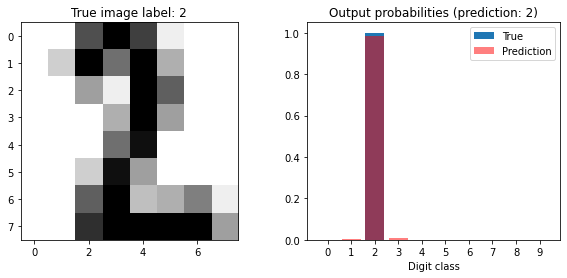

In [6]:
# Train for one epoch
learning_rate = 0.01
for i, (x, y) in enumerate(zip(X_train, y_train)):
    lr.train(x, y, learning_rate)
    if i % 100 == 0:
        train_loss = lr.loss(X_train, y_train)
        train_acc = lr.accuracy(X_train, y_train)
        test_acc = lr.accuracy(X_test, y_test)
        print(f"Update #{i}, train loss: {train_loss:.4f}, train acc: {train_acc:.3f}, test acc: {test_acc:.3f}")

# Visualize after training
plot_prediction(lr, sample_idx=0)

# Step 7: Sigmoid and DSigmoid

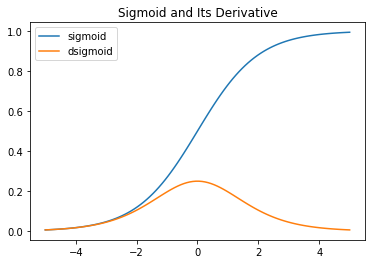

In [7]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def dsigmoid(X):
    s = sigmoid(X)
    return s * (1 - s)

# Visualize sigmoid
x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, dsigmoid(x), label='dsigmoid')
plt.title("Sigmoid and Its Derivative")
plt.legend()
plt.show()

# Step 8: Neural Network

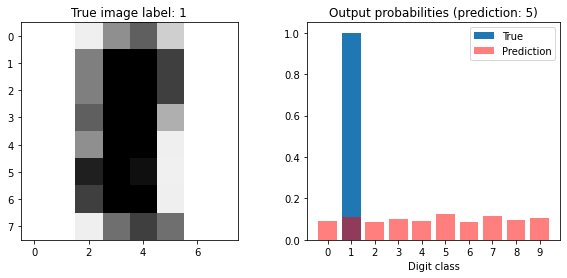

Initial loss: 2.3128223
Initial accuracy: 0.07400130975769482


In [8]:
class NeuralNet:
    def __init__(self, input_size, hidden_size, output_size):
        self.W_h = np.random.uniform(low=-0.1, high=0.1, size=(input_size, hidden_size))
        self.b_h = np.zeros(hidden_size)
        self.W_o = np.random.uniform(low=-0.1, high=0.1, size=(hidden_size, output_size))
        self.b_o = np.zeros(output_size)
        self.output_size = output_size

    def forward(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y

    def loss(self, X, y):
        return nll(one_hot(self.output_size, y), self.forward(X))

    def forward_keep_activations(self, X):
        z_h = np.dot(X, self.W_h) + self.b_h
        h = sigmoid(z_h)
        z_o = np.dot(h, self.W_o) + self.b_o
        y = softmax(z_o)
        return y, h, z_h

    def grad_loss(self, x, y_true):
        y, h, z_h = self.forward_keep_activations(x)
        target = one_hot(self.output_size, y_true)
        if target.ndim > 1:
            target = target.squeeze()
        grad_z_o = y - target
        grad_W_o = np.outer(h, grad_z_o)
        grad_b_o = grad_z_o
        grad_h = np.dot(grad_z_o, self.W_o.T)
        grad_z_h = grad_h * dsigmoid(z_h)
        grad_W_h = np.outer(x, grad_z_h)
        grad_b_h = grad_z_h
        return {"W_h": grad_W_h, "b_h": grad_b_h, "W_o": grad_W_o, "b_o": grad_b_o}

    def train(self, x, y, learning_rate):
        grads = self.grad_loss(x, y)
        self.W_h -= learning_rate * grads["W_h"]
        self.b_h -= learning_rate * grads["b_h"]
        self.W_o -= learning_rate * grads["W_o"]
        self.b_o -= learning_rate * grads["b_o"]

    def predict(self, X):
        if len(X.shape) == 1:
            return np.argmax(self.forward(X))
        else:
            return np.argmax(self.forward(X), axis=1)

    def accuracy(self, X, y):
        if X.ndim == 1:
            X = X[np.newaxis, :]
        return np.mean(self.predict(X) == y)


# Initialize and test
n_hidden = 10
model = NeuralNet(n_features, n_hidden, n_classes)
plot_prediction(model, sample_idx=5)
print("Initial loss:", model.loss(X_train, y_train))
print("Initial accuracy:", model.accuracy(X_train, y_train))

# Step 9: Epochs


Random init: train loss: 2.31282, train acc: 0.074, test acc: 0.100
Epoch 1, train loss: 0.28438, train acc: 0.940, test acc: 0.885
Epoch 2, train loss: 0.15674, train acc: 0.969, test acc: 0.937
Epoch 3, train loss: 0.10658, train acc: 0.979, test acc: 0.948
Epoch 4, train loss: 0.08048, train acc: 0.987, test acc: 0.948
Epoch 5, train loss: 0.06249, train acc: 0.991, test acc: 0.959
Epoch 6, train loss: 0.05316, train acc: 0.991, test acc: 0.959
Epoch 7, train loss: 0.04241, train acc: 0.995, test acc: 0.970
Epoch 8, train loss: 0.03669, train acc: 0.996, test acc: 0.967
Epoch 9, train loss: 0.03425, train acc: 0.997, test acc: 0.967
Epoch 10, train loss: 0.03057, train acc: 0.997, test acc: 0.970
Epoch 11, train loss: 0.02540, train acc: 0.997, test acc: 0.970
Epoch 12, train loss: 0.02295, train acc: 0.997, test acc: 0.967
Epoch 13, train loss: 0.02101, train acc: 0.997, test acc: 0.963
Epoch 14, train loss: 0.01931, train acc: 0.998, test acc: 0.967
Epoch 15, train loss: 0.01780,

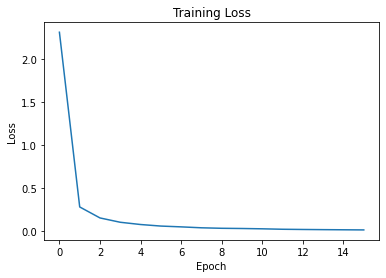

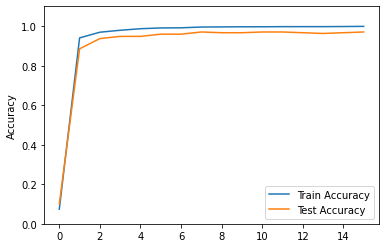

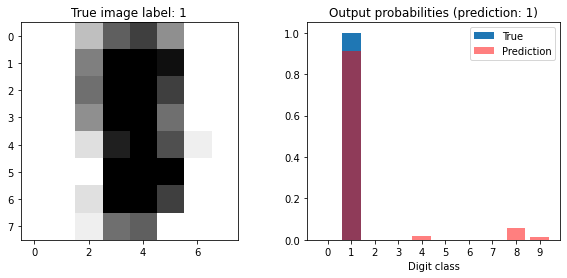

In [9]:
# Train for 15 epochs
losses, accuracies, accuracies_test = [], [], []
losses.append(model.loss(X_train, y_train))
accuracies.append(model.accuracy(X_train, y_train))
accuracies_test.append(model.accuracy(X_test, y_test))
print(f"\nRandom init: train loss: {losses[-1]:.5f}, train acc: {accuracies[-1]:.3f}, test acc: {accuracies_test[-1]:.3f}")

for epoch in range(15):
    for i, (x, y) in enumerate(zip(X_train, y_train)):
        model.train(x, y, 0.1)
    losses.append(model.loss(X_train, y_train))
    accuracies.append(model.accuracy(X_train, y_train))
    accuracies_test.append(model.accuracy(X_test, y_test))
    print(f"Epoch {epoch+1}, train loss: {losses[-1]:.5f}, train acc: {accuracies[-1]:.3f}, test acc: {accuracies_test[-1]:.3f}")

# Plot training progress
plt.figure()
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(accuracies, label='Train Accuracy')
plt.plot(accuracies_test, label='Test Accuracy')
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Visualize prediction
plot_prediction(model, sample_idx=4)

# Step 10: Neural Network with TensorFlow

Epoch 0, Train acc: 0.110, Test acc: 0.067
Epoch 1, Train acc: 0.544, Test acc: 0.489
Epoch 2, Train acc: 0.753, Test acc: 0.719
Epoch 3, Train acc: 0.829, Test acc: 0.811
Epoch 4, Train acc: 0.891, Test acc: 0.878
Epoch 5, Train acc: 0.929, Test acc: 0.911
Epoch 6, Train acc: 0.950, Test acc: 0.933
Epoch 7, Train acc: 0.959, Test acc: 0.944
Epoch 8, Train acc: 0.967, Test acc: 0.948
Epoch 9, Train acc: 0.969, Test acc: 0.956


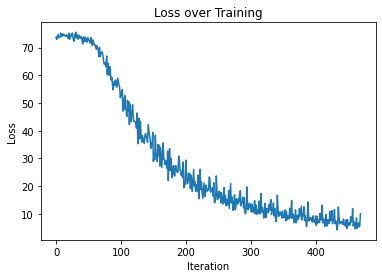

In [10]:
import tensorflow as tf


# Hyperparameters
batch_size = 32
hid_size = 15
learning_rate = 0.01
num_epochs = 10
input_size = X_train.shape[1]
output_size = 10

# Placeholders
X = tf.placeholder("float32", shape=[None, input_size])
y = tf.placeholder("int32", shape=[None])

# Weight initialization
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

# Model
W_h = init_weights([input_size, hid_size])
b_h = init_weights([hid_size])
h = tf.nn.sigmoid(tf.matmul(X, W_h) + b_h)
W_o = init_weights([hid_size, output_size])
b_o = init_weights([output_size])
out_act = tf.matmul(h, W_o) + b_o

# Loss and optimizer
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out_act, labels=y)
loss = tf.reduce_sum(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_op = optimizer.minimize(loss)

# Prediction
predict = tf.nn.softmax(out_act)

# Training
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    losses = []
    for e in range(num_epochs):
        for i in range(X_train.shape[0] // batch_size):
            idx = i * batch_size
            idxn = min(X_train.shape[0], (i + 1) * batch_size)
            batch_xs, batch_ys = X_train[idx:idxn], y_train[idx:idxn]
            _, l = sess.run([train_op, loss], feed_dict={X: batch_xs, y: batch_ys})
            losses.append(l)
        # Accuracy
        predicts_train = sess.run(predict, feed_dict={X: X_train})
        predicts_test = sess.run(predict, feed_dict={X: X_test})
        train_acc = np.mean(np.argmax(predicts_train, axis=1) == y_train)
        test_acc = np.mean(np.argmax(predicts_test, axis=1) == y_test)
        print(f"Epoch {e}, Train acc: {train_acc:.3f}, Test acc: {test_acc:.3f}")
    
    # Plot loss
    plt.figure()
    plt.plot(losses)
    plt.title("Loss over Training")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()